Datasets loaded successfully.
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  L

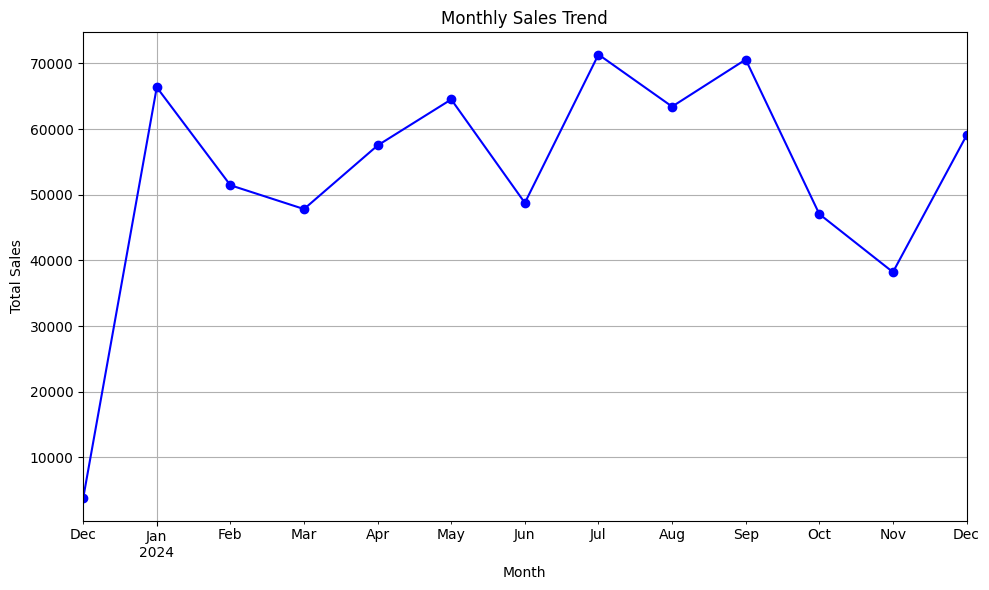

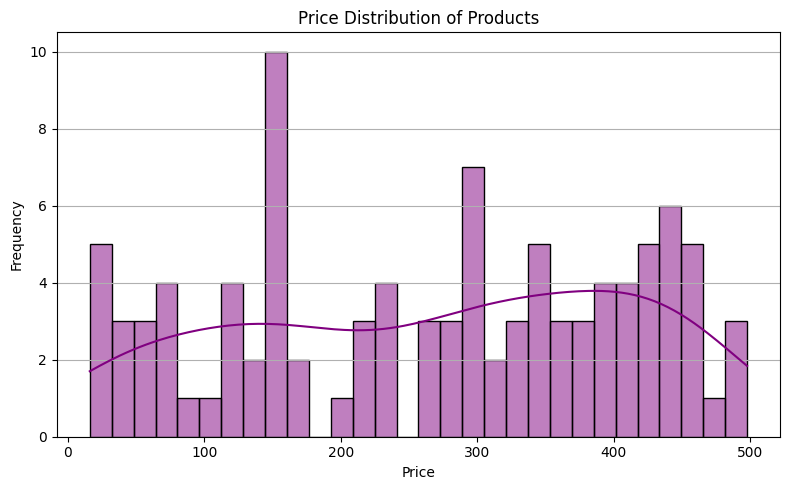

Number of potential outliers in Price: 0
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


try:
    customers = pd.read_csv("/content/Customers.csv")
    products = pd.read_csv("/content/Products.csv")
    transactions = pd.read_csv("/content/Transactions.csv")
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading file: {e}")
    exit()


print(customers.head())
print(customers.info())
print(customers.describe())

print(products.head())
print(products.info())

print(transactions.head())
print(transactions.info())

# Check for missing values
print("Missing values in datasets:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Convert dates to datetime type
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Check for duplicates
print(f"Duplicate rows in Customers: {customers.duplicated().sum()}")
print(f"Duplicate rows in Products: {products.duplicated().sum()}")
print(f"Duplicate rows in Transactions: {transactions.duplicated().sum()}")

# Merge transactions and customer data for detailed analysis
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')

# Basic analysis of total sales per region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Total sales per region:")
print(region_sales)

# Analyzing top products
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print("Top products by quantity sold:")
print(top_products)

# Monthly sales trend
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', title="Monthly Sales Trend", marker='o', color='blue')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_sales_trend.png")
plt.show()

# Distribution of prices
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], kde=True, color='purple', bins=30)
plt.title("Price Distribution of Products")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("price_distribution.png")
plt.show()

# Highlight outliers in price
q1 = products['Price'].quantile(0.25)
q3 = products['Price'].quantile(0.75)
iqr = q3 - q1
outliers = products[(products['Price'] < q1 - 1.5 * iqr) | (products['Price'] > q3 + 1.5 * iqr)]
print(f"Number of potential outliers in Price: {len(outliers)}")
print(outliers)


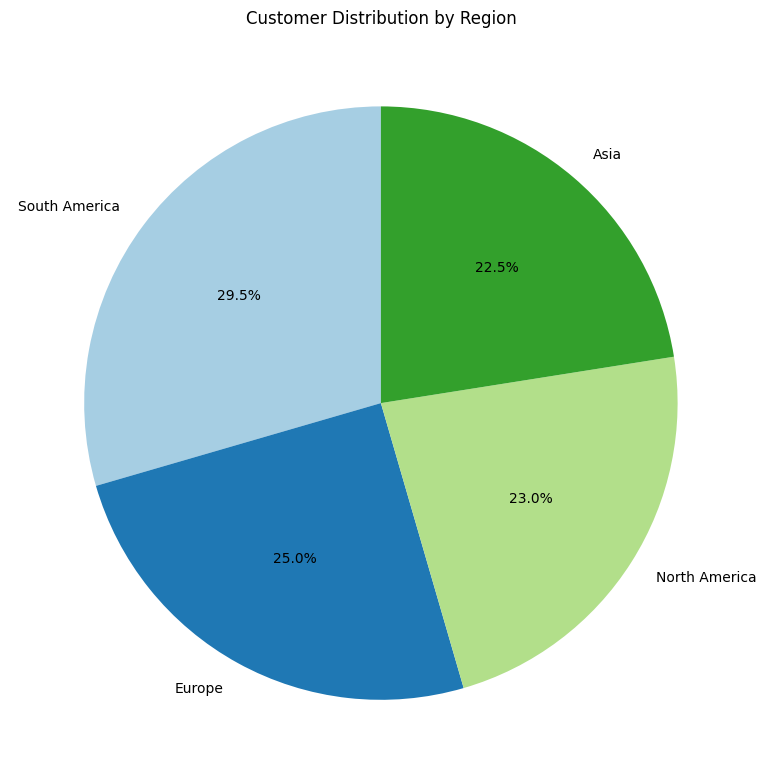

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Convert dates to datetime type
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Merge transactions and customer data for detailed analysis
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')

# Pie Chart: Distribution of customers by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 8))
region_counts.plot.pie(autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors)
plt.title("Customer Distribution by Region")
plt.ylabel("")
plt.tight_layout()
plt.savefig("customer_distribution_pie_chart.png")
plt.show()



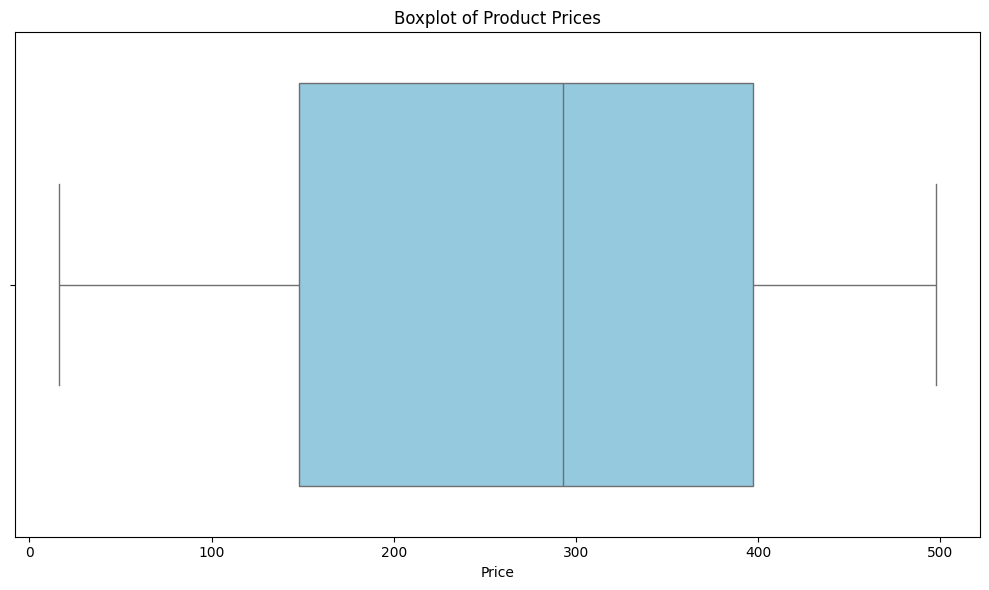

In [6]:

# Boxplot: Product prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=products['Price'], color='skyblue')
plt.title("Boxplot of Product Prices")
plt.xlabel("Price")
plt.tight_layout()
plt.savefig("product_price_boxplot.png")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


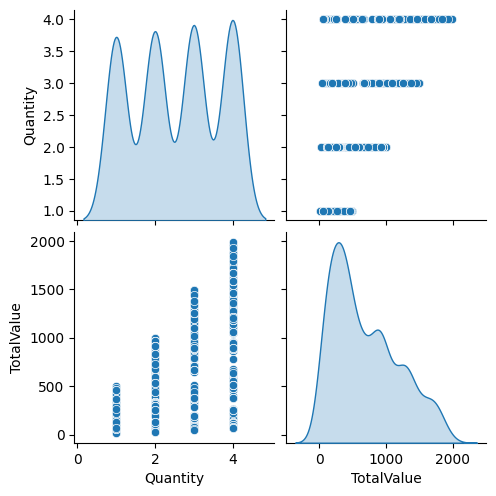

<ipython-input-7-96f1fd82f43d>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


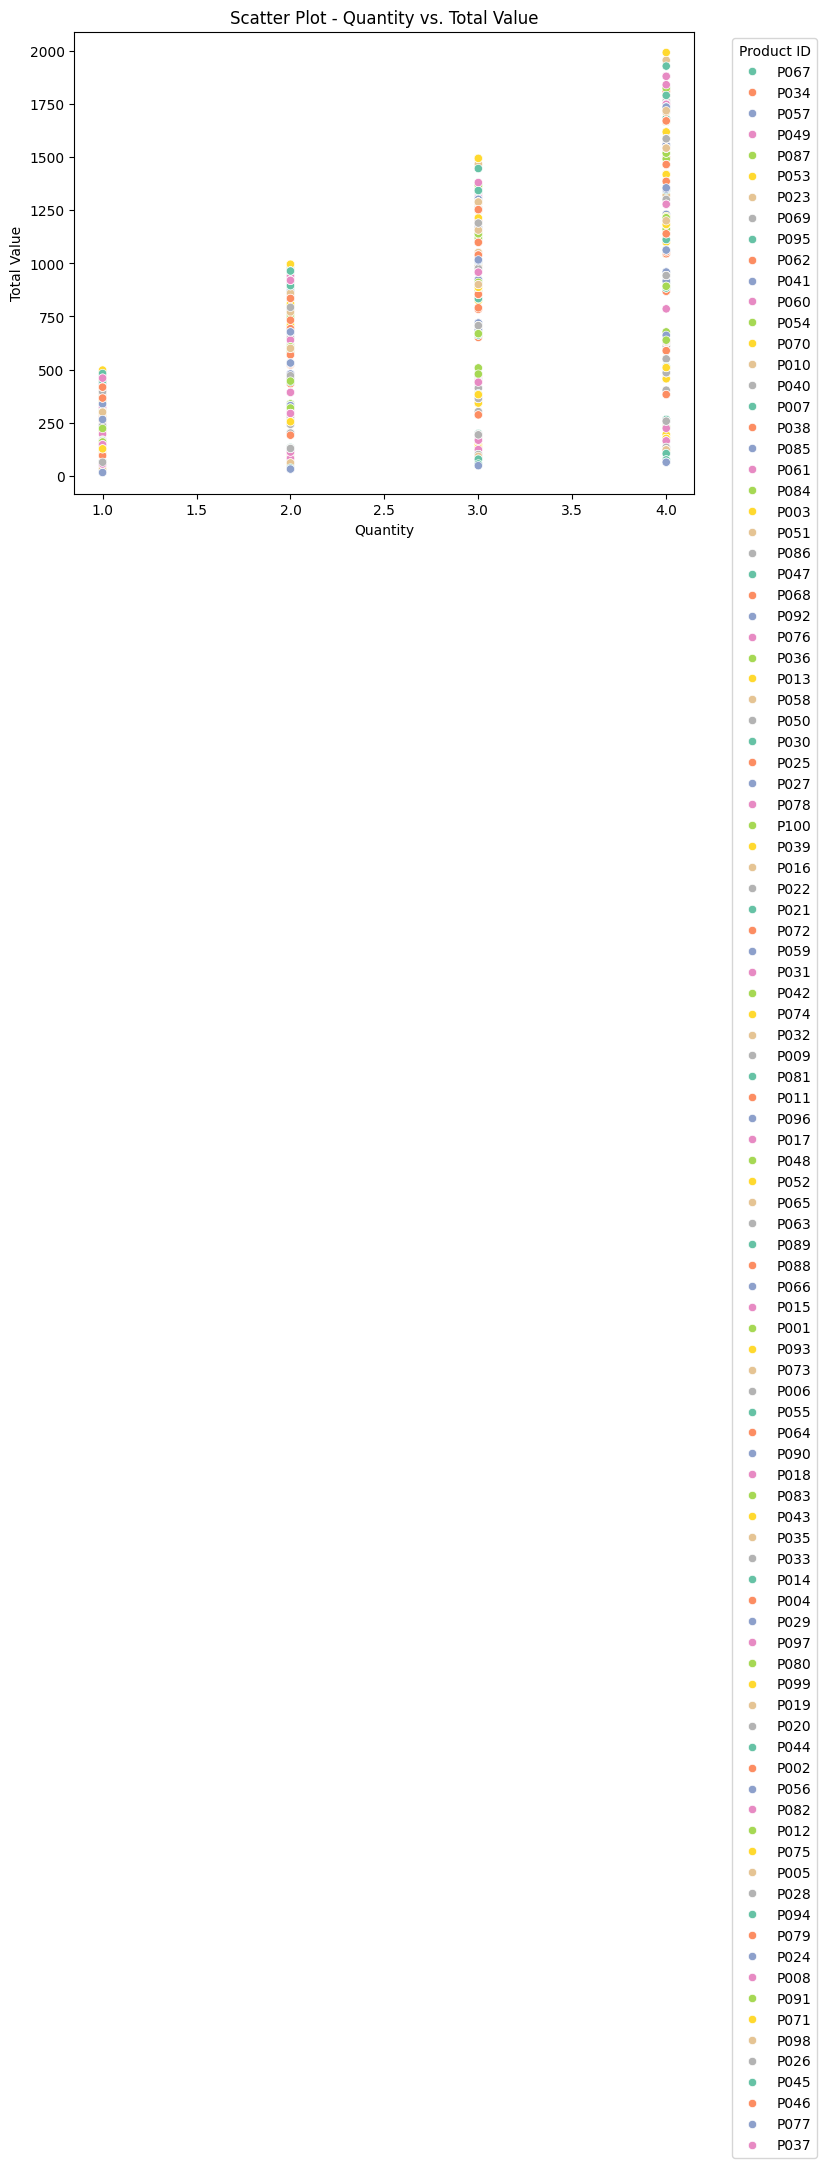

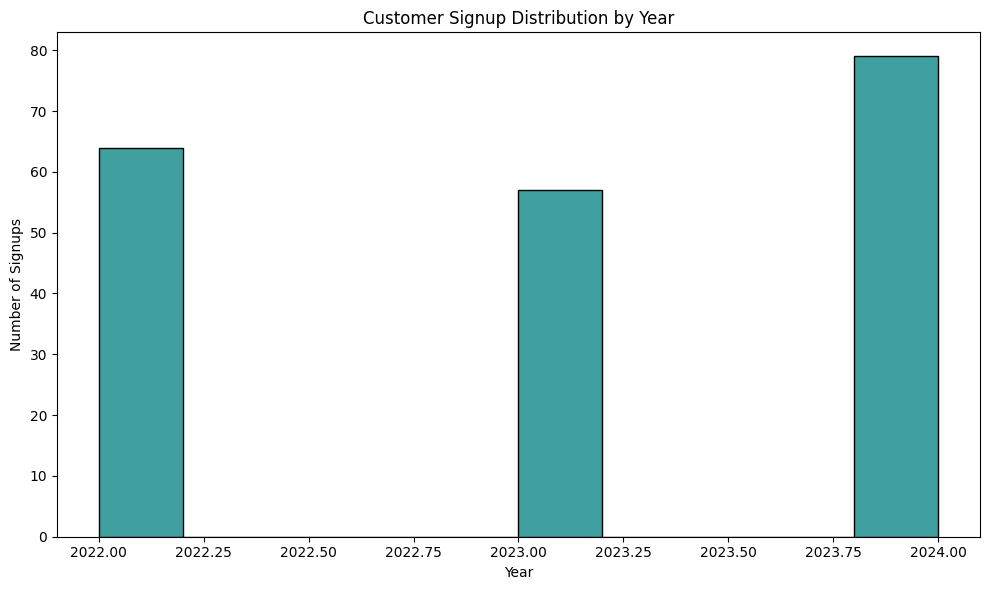

In [7]:

# Pair Plot: Exploring relationships in transactions
selected_columns = ['Quantity', 'TotalValue']
sns.pairplot(transactions[selected_columns], diag_kind='kde', palette="husl")
plt.savefig("transactions_pairplot.png")
plt.show()


# Scatter Plot: Quantity vs. Total Value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions, x='Quantity', y='TotalValue', hue='ProductID', palette='Set2')
plt.title("Scatter Plot - Quantity vs. Total Value")
plt.xlabel("Quantity")
plt.ylabel("Total Value")
plt.legend(title="Product ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("quantity_vs_totalvalue_scatterplot.png")
plt.show()

# Histogram: Distribution of customer signup dates by year
customers['SignupYear'] = customers['SignupDate'].dt.year
plt.figure(figsize=(10, 6))
sns.histplot(customers['SignupYear'], kde=False, bins=10, color='teal')
plt.title("Customer Signup Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.tight_layout()
plt.savefig("signup_distribution_histogram.png")
plt.show()


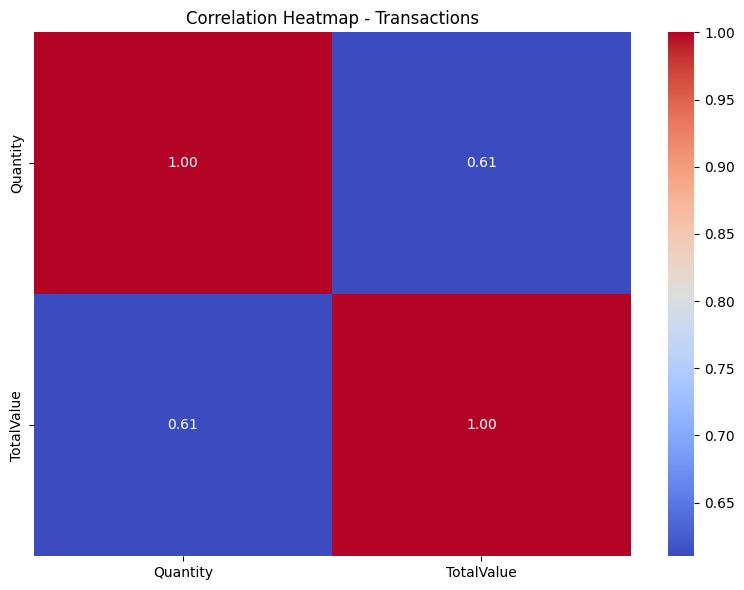

In [8]:

# Heatmap: Correlation matrix for transactions
correlation_matrix = transactions[['Quantity', 'TotalValue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Transactions")
plt.tight_layout()
plt.savefig("transactions_correlation_heatmap.png")
plt.show()

#

<ipython-input-9-101d025b0b24>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data, x='Region', palette="viridis")


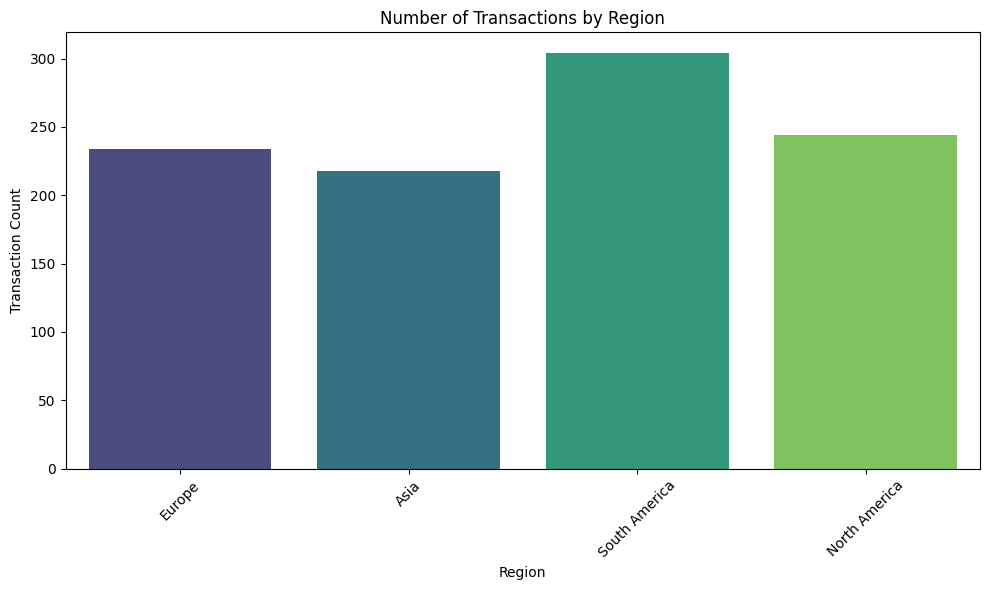

<ipython-input-9-101d025b0b24>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_data, x='Region', y='TotalValue', palette="muted")


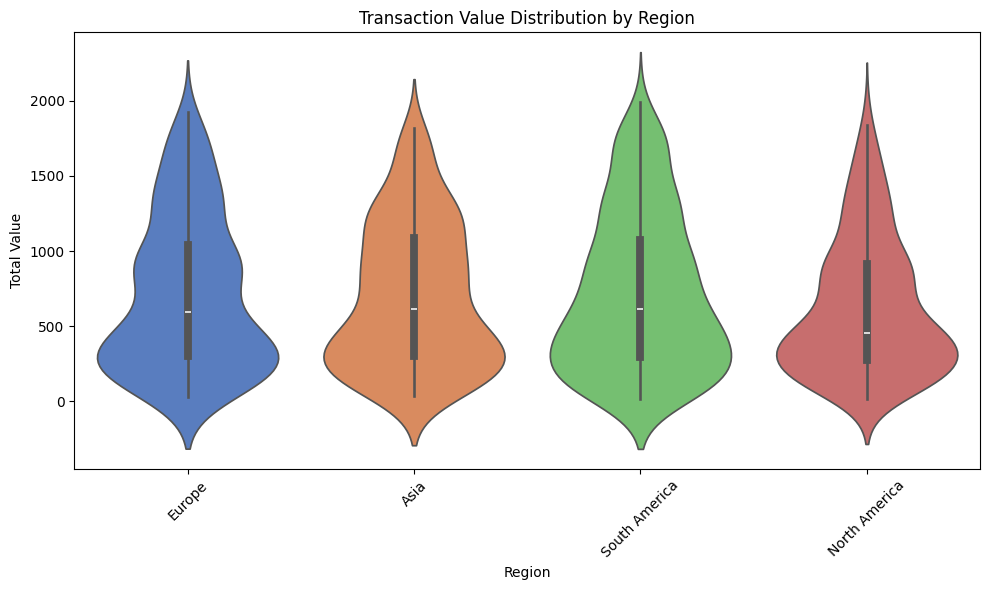

In [9]:

plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Region', palette="viridis")
plt.title("Number of Transactions by Region")
plt.xlabel("Region")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("transactions_by_region_countplot.png")
plt.show()

# Violin Plot: Total transaction value distribution by region
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_data, x='Region', y='TotalValue', palette="muted")
plt.title("Transaction Value Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("transaction_value_violinplot.png")
plt.show()

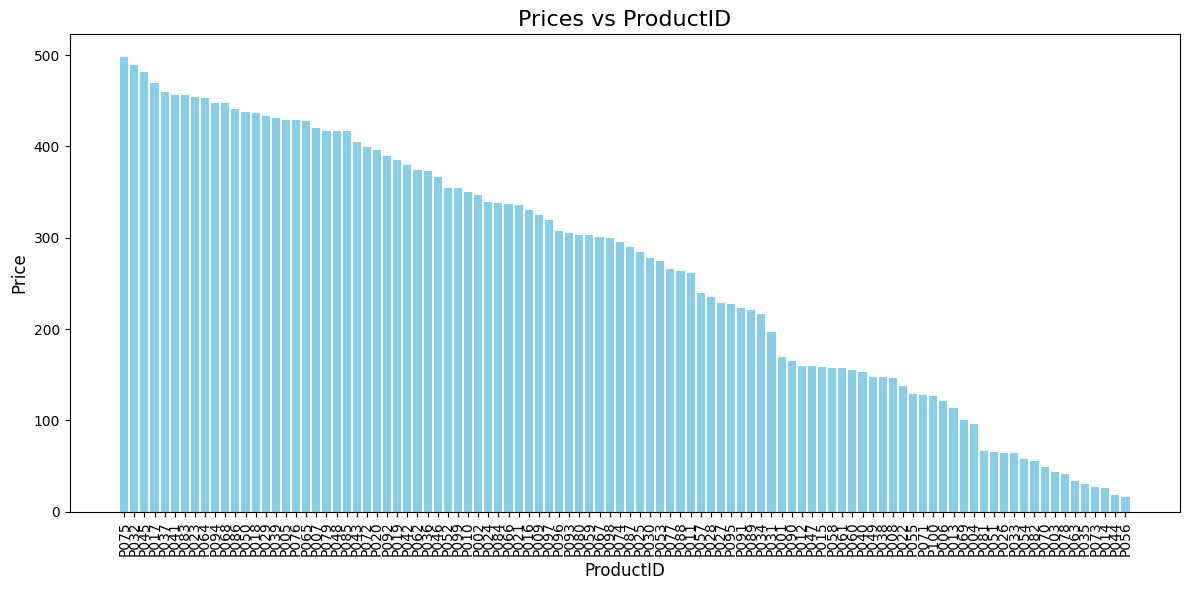

Top 10 Highest-Priced Products:
   ProductID               ProductName   Price
74      P075          TechPro Textbook  497.76
31      P032        BookWorld Cookbook  488.63
44      P045         SoundWave T-Shirt  481.78
16      P017       ActiveWear Textbook  469.77
36      P037      SoundWave Smartwatch  459.86
40      P041  ComfortLiving Smartphone  456.28
82      P083     ActiveWear Smartwatch  455.72
22      P023   ActiveWear Cookware Set  454.53
63      P064   HomeSense Running Shoes  452.42
93      P094    HomeSense Cookware Set  447.34


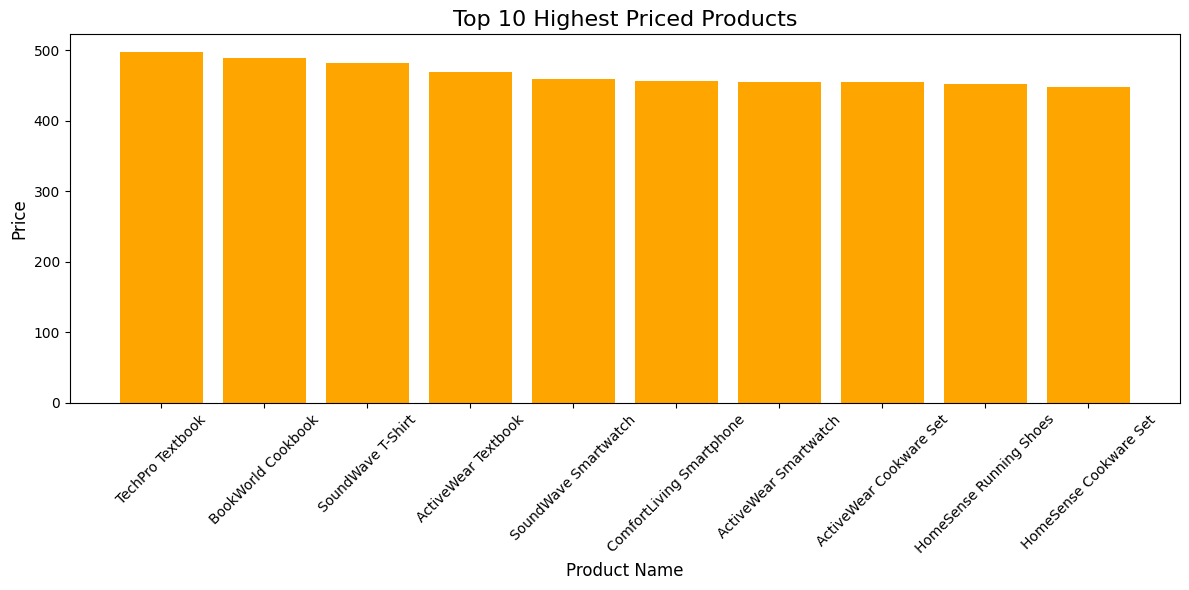

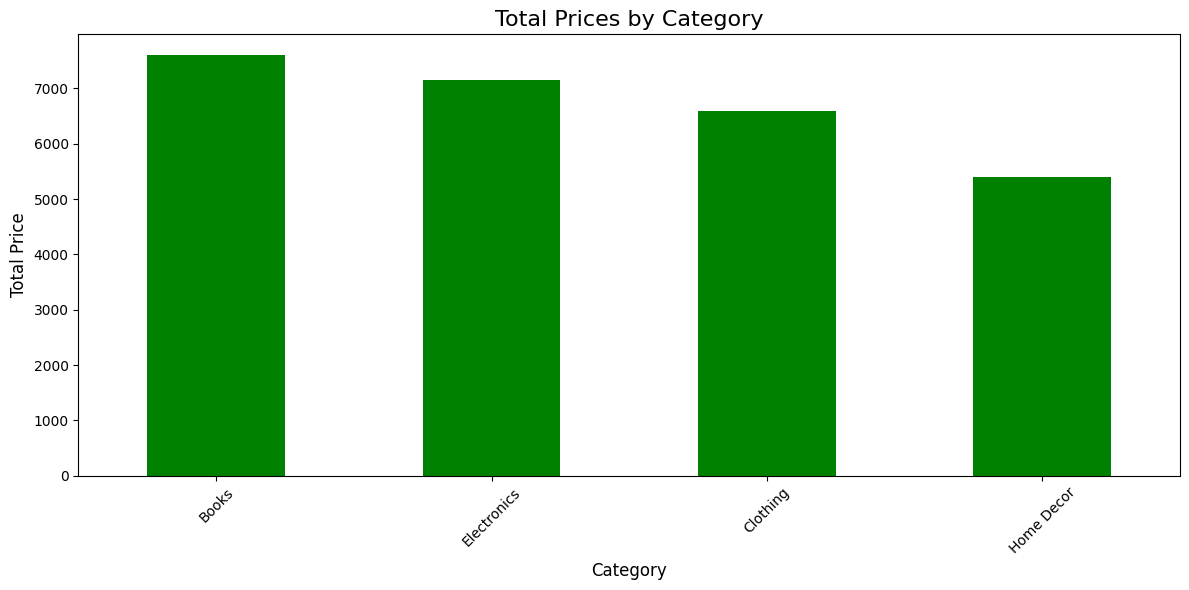

Top 10 Customers by Total Purchases:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


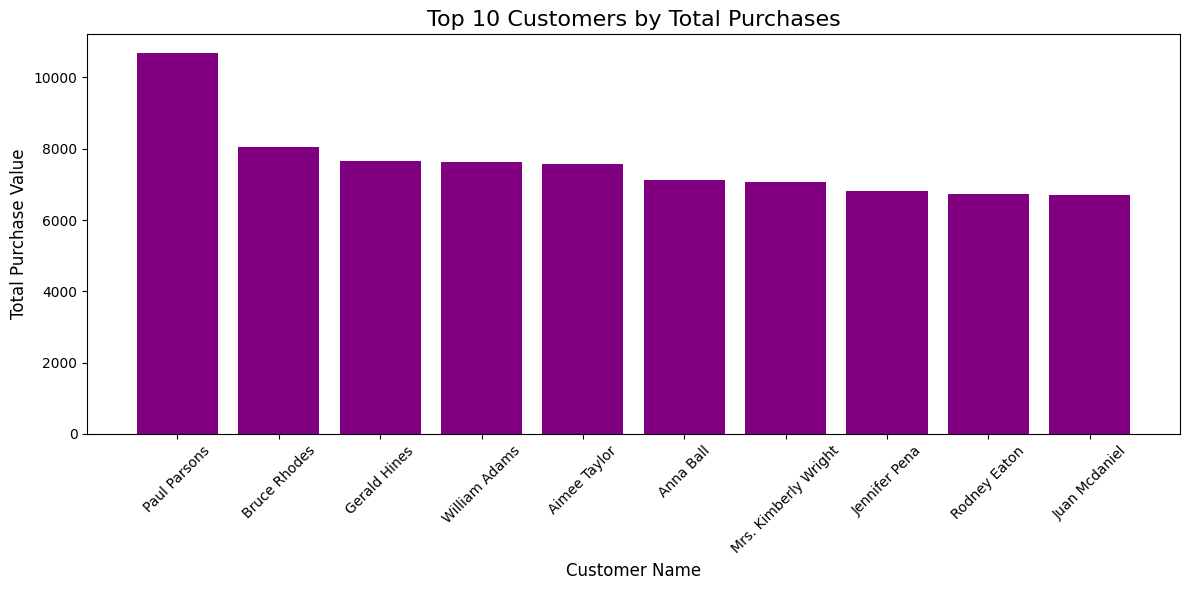

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Convert dates to datetime type
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets for analysis
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

# 1. Bar graph for prices and ProductID
plt.figure(figsize=(12, 6))
price_per_product = products.sort_values(by='Price', ascending=False)
plt.bar(price_per_product['ProductID'], price_per_product['Price'], color='skyblue')
plt.title('Prices vs ProductID', fontsize=16)
plt.xlabel('ProductID', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Top 10 highest-priced products and their names and costs
top_10_products = products.sort_values(by='Price', ascending=False).head(10)
print("Top 10 Highest-Priced Products:")
print(top_10_products[['ProductID', 'ProductName', 'Price']])

# Bar graph for top 10 highest-priced products
plt.figure(figsize=(12, 6))
plt.bar(top_10_products['ProductName'], top_10_products['Price'], color='orange')
plt.title('Top 10 Highest Priced Products', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Bar graph for category-wise total prices
category_prices = products.groupby('Category')['Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
category_prices.plot(kind='bar', color='green')
plt.title('Total Prices by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Top 10 customers by total purchase value
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Total Purchases:")
print(top_customers)

# Bar graph for top 10 customers
plt.figure(figsize=(12, 6))
plt.bar(top_customers.index, top_customers.values, color='purple')
plt.title('Top 10 Customers by Total Purchases', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Purchase Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler

# Specify the correct numerical columns for scaling
numerical_cols = ['TotalValue', 'TransactionID', 'Price_y']

# Standardize numerical columns
scaler = StandardScaler()
customer_profiles[numerical_cols] = scaler.fit_transform(customer_profiles[numerical_cols])

print(customer_profiles.head())
from sklearn.preprocessing import StandardScaler

# Specify the correct numerical columns for scaling
numerical_cols = ['TotalValue', 'TransactionID', 'Price_y']

# Standardize numerical columns
scaler = StandardScaler()
customer_profiles[numerical_cols] = scaler.fit_transform(customer_profiles[numerical_cols])

print(customer_profiles.head())
from sklearn.preprocessing import StandardScaler

# Specify the correct numerical columns for scaling
numerical_cols = ['TotalValue', 'TransactionID', 'Price_y']

# Standardize numerical columns
scaler = StandardScaler()
customer_profiles[numerical_cols] = scaler.fit_transform(customer_profiles[numerical_cols])

print(customer_profiles.head())
from sklearn.preprocessing import StandardScaler

# Specify the correct numerical columns for scaling
numerical_cols = ['TotalValue', 'TransactionID', 'Price_y']

# Standardize numerical columns
scaler = StandardScaler()
customer_profiles[numerical_cols] = scaler.fit_transform(customer_profiles[numerical_cols])

print(customer_profiles.head())


  CustomerID  TotalValue  TransactionID   Price_y  Books  Clothing  \
0      C0001   -0.061701      -0.011458  0.094670      1         0   
1      C0002   -0.877744      -0.467494 -0.904016      0         1   
2      C0003   -0.405857      -0.467494 -1.094109      0         1   
3      C0004    1.032547       1.356650 -0.447702      1         0   
4      C0005   -0.783929      -0.923530  0.285581      0         0   

   Electronics  Home Decor  
0            1           1  
1            0           1  
2            1           1  
3            1           1  
4            1           1  
  CustomerID  TotalValue  TransactionID   Price_y  Books  Clothing  \
0      C0001   -0.061701      -0.011458  0.094670      1         0   
1      C0002   -0.877744      -0.467494 -0.904016      0         1   
2      C0003   -0.405857      -0.467494 -1.094109      0         1   
3      C0004    1.032547       1.356650 -0.447702      1         0   
4      C0005   -0.783929      -0.923530  0.285581      

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Preprocessing: Merge customer and transaction data
customer_data = pd.merge(transactions, customers, on="CustomerID", how="left")
customer_data = customer_data.groupby('CustomerID').agg({
    'Price': 'mean',
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Region': 'first'
}).reset_index()

# Feature engineering: Normalize numerical features
scaler = StandardScaler()
customer_data[['Price', 'Quantity', 'TotalValue']] = scaler.fit_transform(customer_data[['Price', 'Quantity', 'TotalValue']])

# Create a function to calculate similarity
def get_similar_customers(input_customer_id, customer_data, top_n=3):
    # Select the input customer's data based on CustomerID
    input_customer = customer_data[customer_data['CustomerID'] == input_customer_id][['Price', 'Quantity', 'TotalValue']]

    # Calculate cosine similarity using only numerical features
    similarities = cosine_similarity(input_customer, customer_data[['Price', 'Quantity', 'TotalValue']])
    similarity_scores = similarities.flatten()

    # Get top N most similar customers
    similar_customers_idx = similarity_scores.argsort()[-top_n:][::-1]
    similar_customers = customer_data.iloc[similar_customers_idx]
    return similar_customers[['CustomerID', 'Region']], similarity_scores[similar_customers_idx]

# Generate Lookalike for the first 20 customers
lookalike_results = {}
for cust_id in customer_data['CustomerID'][:20]:
    # Pass only the CustomerID to the function
    similar_customers, similarity_scores = get_similar_customers(cust_id, customer_data)
    lookalike_results[cust_id] = list(zip(similar_customers['CustomerID'], similarity_scores))

# Save the lookalike results to a CSV
lookalike_df = pd.DataFrame.from_dict(lookalike_results, orient='index')
lookalike_df.to_csv("FirstName_LastName_Lookalike.csv", header=False)


Davies-Bouldin Index: 0.9467058109377833


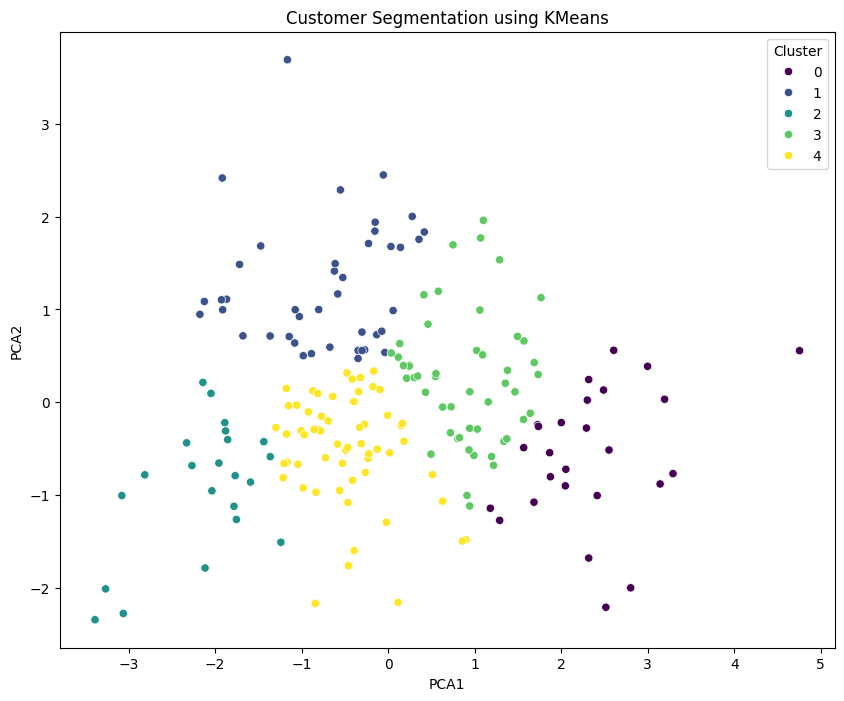

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Merge customer data with transactions data
customer_profile = pd.merge(transactions, customers, on='CustomerID', how='left')
customer_profile = customer_profile.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
    'Region': 'first'
}).reset_index()

# Feature engineering and normalization
customer_profile[['TotalValue', 'Quantity', 'Price']] = scaler.fit_transform(customer_profile[['TotalValue', 'Quantity', 'Price']])

# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(customer_profile[['TotalValue', 'Quantity', 'Price']])

# Calculate Davies-Bouldin index
db_index = davies_bouldin_score(customer_profile[['TotalValue', 'Quantity', 'Price']], customer_profile['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
customer_profile['PCA1'], customer_profile['PCA2'] = pca.fit_transform(customer_profile[['TotalValue', 'Quantity', 'Price']]).T

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=customer_profile, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("Customer Segmentation using KMeans")
plt.show()


Agglomerative Davies-Bouldin Index: 0.9503938553085753
Agglomerative Silhouette Score: 0.3409402582390182


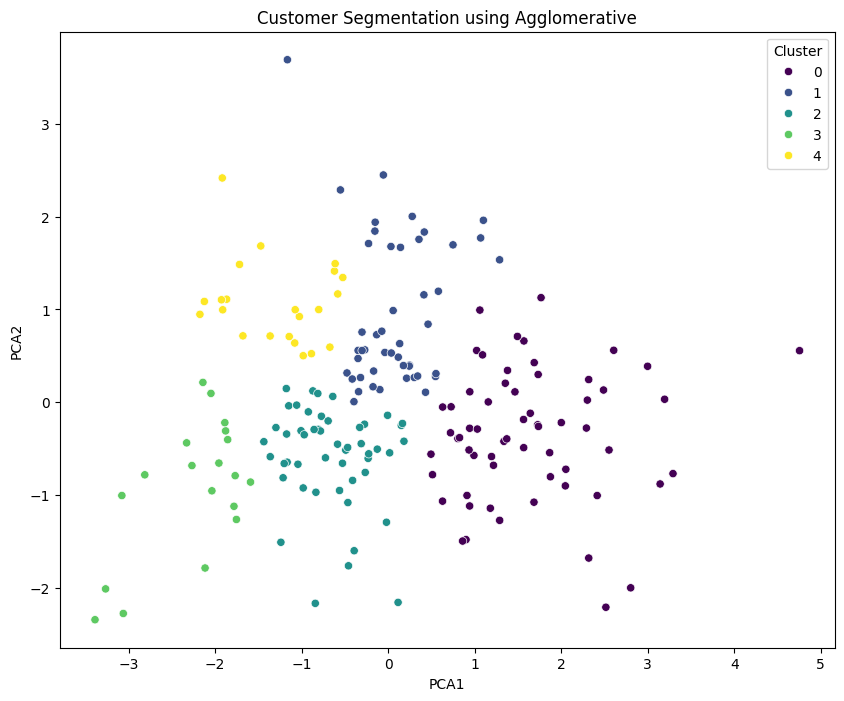

DBSCAN Davies-Bouldin Index: 6.28813637624159
DBSCAN Silhouette Score: 0.15413221583292927


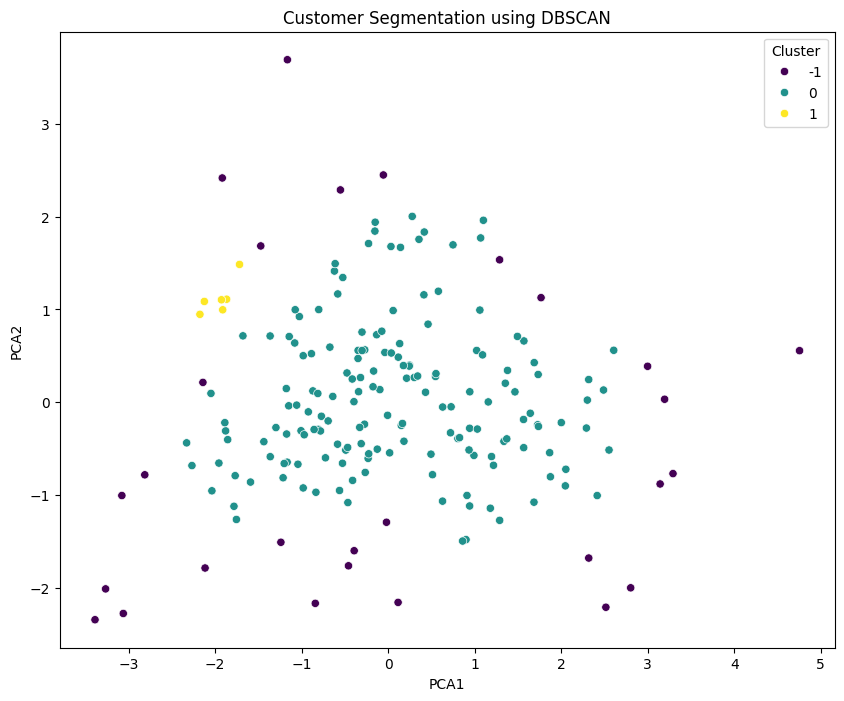

BIRCH Davies-Bouldin Index: 0.9613908648427267
BIRCH Silhouette Score: 0.2881156796095996


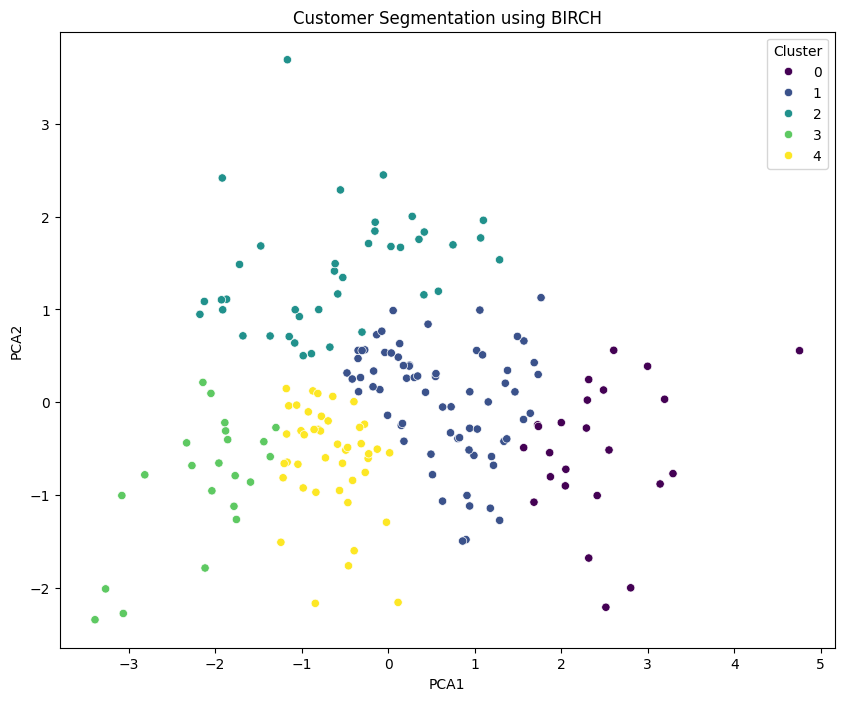

In [25]:

# prompt: from sklearn.cluster import KMeans
# from sklearn.metrics import davies_bouldin_score
# from sklearn.decomposition import PCA
# # Merge customer data with transactions data
# customer_profile = pd.merge(transactions, customers, on='CustomerID', how='left')
# customer_profile = customer_profile.groupby('CustomerID').agg({
#     'TotalValue': 'sum',
#     'Quantity': 'sum',
#     'Price': 'mean',
#     'Region': 'first'
# }).reset_index()
# # Feature engineering and normalization
# customer_profile[['TotalValue', 'Quantity', 'Price']] = scaler.fit_transform(customer_profile[['TotalValue', 'Quantity', 'Price']])
# # KMeans Clustering
# kmeans = KMeans(n_clusters=5, random_state=42)
# customer_profile['Cluster'] = kmeans.fit_predict(customer_profile[['TotalValue', 'Quantity', 'Price']])
# # Calculate Davies-Bouldin index
# db_index = davies_bouldin_score(customer_profile[['TotalValue', 'Quantity', 'Price']], customer_profile['Cluster'])
# print(f"Davies-Bouldin Index: {db_index}")
# # PCA for dimensionality reduction for visualization
# pca = PCA(n_components=2)
# customer_profile['PCA1'], customer_profile['PCA2'] = pca.fit_transform(customer_profile[['TotalValue', 'Quantity', 'Price']]).T
# # Visualize the clusters
# plt.figure(figsize=(10, 8))
# sns.scatterplot(data=customer_profile, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
# plt.title("Customer Segmentation using KMeans")
# plt.show()
# do using diifrfent typesof clustering

from sklearn.cluster import AgglomerativeClustering, DBSCAN, Birch
from sklearn.metrics import silhouette_score

# ... (Your existing code for data loading and preprocessing) ...

# Feature engineering and normalization (using the same scaler as KMeans)
customer_profile[['TotalValue', 'Quantity', 'Price']] = scaler.fit_transform(customer_profile[['TotalValue', 'Quantity', 'Price']])


# Function to perform clustering and evaluate
def perform_clustering(clustering_model, data, model_name):
    customer_profile['Cluster'] = clustering_model.fit_predict(data)
    db_index = davies_bouldin_score(data, customer_profile['Cluster'])
    silhouette_avg = silhouette_score(data, customer_profile['Cluster'])
    print(f"{model_name} Davies-Bouldin Index: {db_index}")
    print(f"{model_name} Silhouette Score: {silhouette_avg}")

    pca = PCA(n_components=2)
    customer_profile['PCA1'], customer_profile['PCA2'] = pca.fit_transform(data).T

    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=customer_profile, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
    plt.title(f"Customer Segmentation using {model_name}")
    plt.show()

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
perform_clustering(agg_clustering, customer_profile[['TotalValue', 'Quantity', 'Price']], "Agglomerative")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
perform_clustering(dbscan, customer_profile[['TotalValue', 'Quantity', 'Price']], "DBSCAN")

# BIRCH
birch = Birch(n_clusters=5)
perform_clustering(birch, customer_profile[['TotalValue', 'Quantity', 'Price']], "BIRCH")